### 학습목표
- 데이터 분석을 위한 기술통계량 탐색하기
- 실데이터를 활용하여 기술통계량 확인하기

In [1]:
# 데이터 로딩
import pandas as pd
hr_info = pd.read_csv('./data/hr-info.csv', encoding ='euc-kr')

In [3]:
# 정보확인
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [4]:
# 기술 통계량 확인 -> 기본 수치데이터에서 확인할 수 있다!
hr_info.describe()
# count : 데이터의 총 개수 -> 결측치(Nan)를 제외한 결과
# mean : 평균
# std: 표준편자 -> 데이터의 분포 / 0에 가까울수록 밀집
# min : 최소값 , max : 최대값
# 25%, 50%, 75% : 사분위수 -> 데이터의 분포 (전체 데이터의 1/4 지점, 2/4 지점, 3/4 지점)
# 50% (중위수) -> 전체데이터에서 가운데 위치 값
# 데이터를 대표하는 대표값: 평균, 중위수, 최빈값

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,31.930000,4.660000,1.919900,5987.000000,34.745000
std,7.111114,6.183492,1.748062,1182.676889,40.470971
min,22.000000,0.000000,0.000000,4500.000000,0.000000
25%,27.000000,0.000000,0.000000,5000.000000,4.000000
50%,30.000000,1.000000,1.795000,5600.000000,21.000000
75%,37.000000,8.000000,3.412500,6825.000000,56.750000
max,49.000000,25.000000,4.960000,10200.000000,240.000000


In [5]:
# 기술 통계량 -> 문자열데이터 확인
hr_info.describe(include = ['object'])
# count 데이터의 개수
# unique: 중복되지 않은 유일한 값  -> 데이터의 카테고리수
# freq : 최빈값
# top : 최빈값의 실제값

,EID,ENAME,GENDER,ORG_CD,POS_CD,EDU_LEVEL,LAST_PROMO_DT,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
count,200,200,200,197,200,200,182,200,200,200,49,49,49,200,200
unique,200,200,2,30,9,5,4,91,2,16,8,6,2,6,2
top,E00206,시이오,M,ORG021,P008,학사 학위,2024-03-01,Salesforce,Y,2024-03-01,2024-03-01,이직,N,KOREA,Y
freq,1,1,117,12,55,159,111,24,151,64,19,28,45,102,150


### 통계값 개별 확인
    - 총합, 평균, 개수, 중복값

- sum()

In [6]:
# 연간 인건비
hr_info['SALARY'].sum()

np.int64(1197400)

- mean()

In [7]:
# 평균 연봉
hr_info['SALARY'].mean()

np.float64(5987.0)

- 데이터의 수
  - count()
  - value_counts()

In [8]:
# count() : 데이터의 수 -> 결측치를 제외한 개수
# 퇴사자의 수
hr_info['RETIRE_DATE'].count()

np.int64(49)

In [10]:
# value_counts(): 컬럼에 있는 unique한 값들을 기준으로 개수를 세주는 함수
hr_info['GENDER'].value_counts()

GENDER
M    117
F     83
Name: count, dtype: int64

In [13]:
# 전체 직원의 남자 비율 확인
men_cnt = hr_info['GENDER'].value_counts()['M']
total_cnt = hr_info['EID'].count()
men_cnt/total_cnt * 100

np.float64(58.5)

- unique()

In [15]:
# 중복되지 않은 유일한 값들을 추출 -> 카테고리
# 직원들의 국적 종류 확인
hr_info['NATION'].unique()

array(['KOREA', 'Japan', 'USA', 'India', 'China', 'UK'], dtype=object)

In [16]:
# 국적에 따른 직원의 수 
hr_info['NATION'].value_counts()

NATION
KOREA    102
USA       22
India     22
Japan     21
UK        18
China     15
Name: count, dtype: int64

- min(), max()

In [19]:
# 직원의 최대 근속년수, 최소 근속년수
print(hr_info['SERVICE_YEAR'].max())
print(hr_info['SERVICE_YEAR'].min())

25
0


- median()

In [20]:
# 나이의 중앙값
hr_info['AGE'].median()

30.0

##### 실습
- 교육수준(EDU_LEVEL)에 따른 평균 연봉

In [23]:
# 교육수준 카테고리 확인 -> unique -> 반복문에 넣기 위함
edu_uni = hr_info['EDU_LEVEL'].unique()
edu_uni

array(['박사 학위', '학사 학위', '석사 학위', '고등학교 졸업', '전문대 학위'], dtype=object)

In [29]:
# 불리언 인덱싱을 통해 한개(박사 학위)의 카테고리의 평균 연봉 구하기
hr_info[hr_info['EDU_LEVEL'] == '박사 학위']['SALARY'].mean().round(2)

np.float64(8166.67)

In [30]:
# 반복문(for)을 활용하여 각각 모든 학력에 대한 평균 연봉 구하기
for i in edu_uni:
    result = hr_info[hr_info['EDU_LEVEL'] == i]['SALARY'].mean().round(2)
    print(f"{i}: {result}")

박사 학위: 8166.67
학사 학위: 5727.04
석사 학위: 6900.0
고등학교 졸업: 6140.0
전문대 학위: 5050.0


- 데이터 그룹화를 이용한 통계분석
  - groupby(): 카테고리별 그룹을 만들어 연산 수행

In [32]:
# 교육 수준에 따른 평균 연봉
# 데이터.groupby(기준 컬럼명).연산함수
hr_info[['EDU_LEVEL','SALARY']].groupby('EDU_LEVEL').mean()
# 카테고리로 설정할 데이터가 들어있는 컬럼을 기준컬럼이라고 한다!

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


In [36]:
# 교육수준과 성별에 따른 평균연봉 확인
data = hr_info[['EDU_LEVEL','SALARY','GENDER']]
data.groupby(['EDU_LEVEL','GENDER']).mean().round()

SALARY
EDU_LEVEL GENDER        
고등학교 졸업   F       6200.0
          M       6100.0
박사 학위     F       8425.0
          M       8038.0
석사 학위     F       7233.0
          M       6525.0
전문대 학위    F       5600.0
          M       4500.0
학사 학위     F       5643.0
          M       5785.0

In [40]:
# 성별에 따른 평균 연봉 구하기
hr_info[['GENDER','SALARY']].groupby('GENDER').mean().round()

,SALARY
GENDER,
F,5976.0
M,5995.0


- 그룹화 후에 여러가지의 통계값 확인

In [42]:
# 성별에 따른 연봉의 다양한 통계량 구하기(평균, 최대값, 최소값, 중앙값)
hr_info[['GENDER','SALARY']].groupby('GENDER').agg(['mean','max','min','median'])

SALARY                     
               mean    max   min  median
GENDER                                  
F       5975.903614   9500  4500  5600.0
M       5994.871795  10200  4500  5600.0

### 데이터간 상관관계 확인

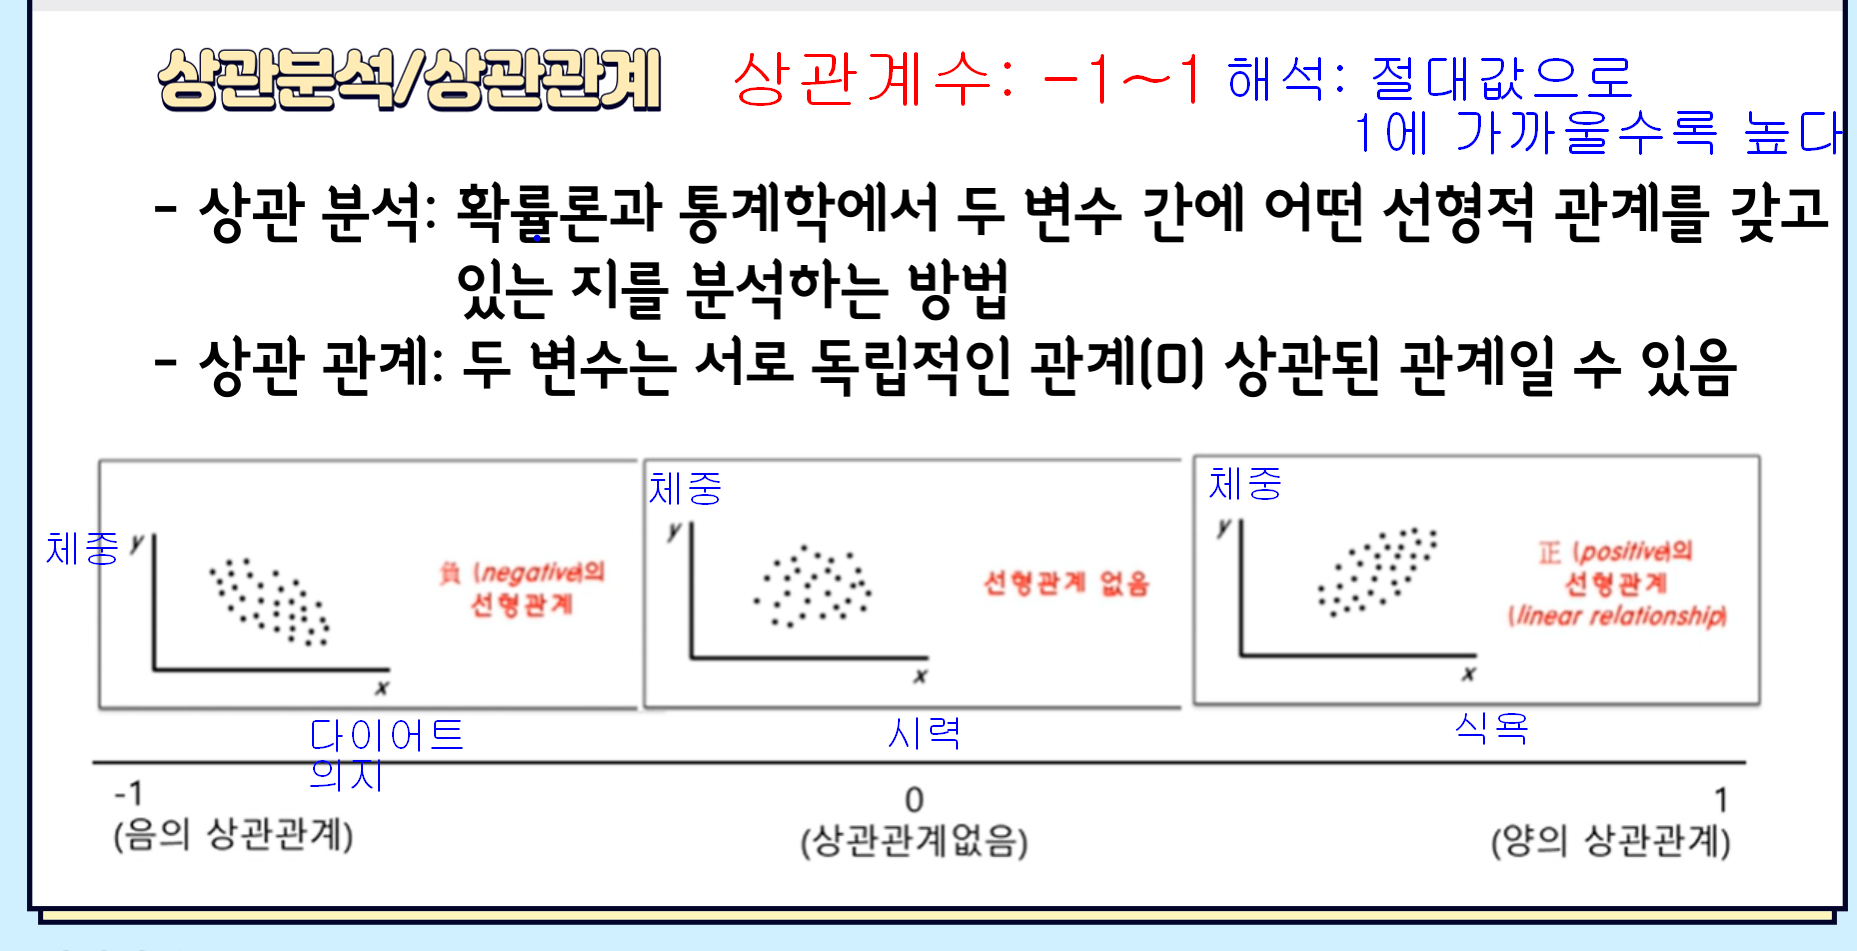

In [44]:
# 상관계수 확인 -> 데이터.corr() -> correlation
# 각 변수간의 선형적 관계를 확인

# 직원의 성과평가점수와 연봉간의 상관계수
hr_info[['PERFORMANCE_SCORE','SALARY']].corr()
# 양의 상관관계 -> 점수가 높을수록 연봉도 높구나~

,PERFORMANCE_SCORE,SALARY
PERFORMANCE_SCORE,1.000000,0.609152
SALARY,0.609152,1.000000


In [46]:
hr_info.corr(numeric_only=True)
# 절대값이 1에 가까울수록 상관관계가 높다!
# 근속년수가 높을수록 연봉이 높다!

,AGE,SERVICE_YEAR,PERFORMANCE_SCORE,SALARY,TRAINING_HOURS
AGE,1.000000,0.932563,0.582203,0.961699,0.575867
SERVICE_YEAR,0.932563,1.000000,0.492801,0.970875,0.559911
PERFORMANCE_SCORE,0.582203,0.492801,1.000000,0.609152,0.551200
SALARY,0.961699,0.970875,0.609152,1.000000,0.628931
TRAINING_HOURS,0.575867,0.559911,0.551200,0.628931,1.000000


In [50]:
# 데이터 정렬
corr_res = hr_info.corr(numeric_only=True)
corr_res['SALARY'].sort_values() # 기본 오름차순 정렬

PERFORMANCE_SCORE    0.609152
TRAINING_HOURS       0.628931
AGE                  0.961699
SERVICE_YEAR         0.970875
SALARY               1.000000
Name: SALARY, dtype: float64

In [51]:
# 내림차순 정렬
corr_res['SALARY'].sort_values(ascending=False) 

SALARY               1.000000
SERVICE_YEAR         0.970875
AGE                  0.961699
TRAINING_HOURS       0.628931
PERFORMANCE_SCORE    0.609152
Name: SALARY, dtype: float64